# LFD

#### data source:
#### github:
#### data description:

In [16]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#Reading File
df= pd.read_excel("C:\\Users\\morwa\\Desktop\\LD Assignment 2\\AdidasUSSalesDatasets3.xlsx")

Summary of the dataset

In [18]:
df.head()

,Retailer,Retailer ID,Invoice Date,Reggion,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Walmart,1128299,2021-06-17,Southeast,Florida,Orlando,Women's Apparel,$103.00,218,2.245,"$1,257",Online
1,West Gear,1128299,2021-07-16,South,Louisiana,New Orleans,Women's Apparel,$103.00,163,1.679,$806,Online
2,Sports Direct,1197831,2021-08-25,South,Alabama,Birmingham,Men's Street Footwear,$10.00,700,7.000,"$3,150",Outlet
3,Sports Direct,1197831,2021-08-27,South,Alabama,Birmingham,Women's Street Footwear,$15.00,575,8.625,"$3,881",Outlet
4,Sports Direct,1197831,2021-08-21,South,Alabama,Birmingham,Women's Street Footwear,$15.00,475,7.125,"$3,206",Outlet


# The dataset shall be cleaned through the following processes:
1. Checking the number of columns
2. Changing misplet column names to the correct names
3. Checking for missing values
4. Checking for duplicate values
5. Checking for outlines

In [19]:
# Rename the column "Reggion" to "Region"
df.rename(columns={"Reggion":"Region"}, inplace=True)

In [20]:
# Checking for the missing values
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      2
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
dtype: int64

In [21]:
# Dropping the missing values of other columns
df1 = df.dropna()
df1.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
dtype: int64

In [22]:
df1.duplicated().sum()

1

In [23]:
df2= df1.drop_duplicates()
df2.duplicated().sum()

0

In [24]:
# Saving the new dataset into a csv file
df2.to_excel("Cleaned_AdidasUSSalesDatasets3.xlsx")

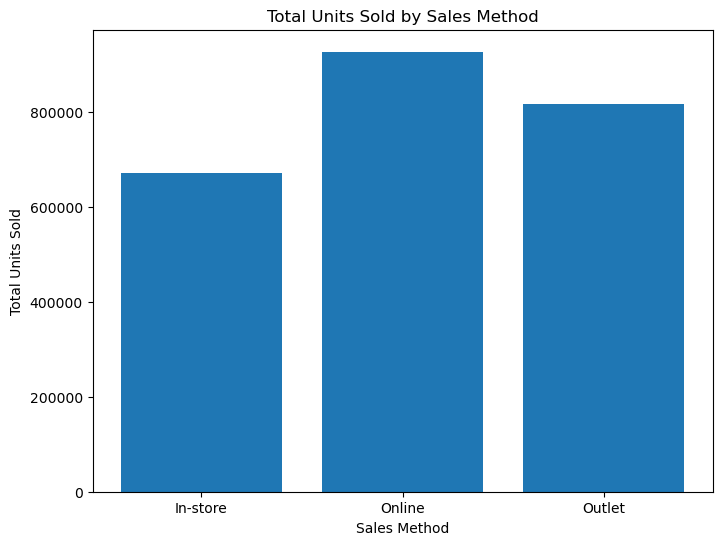

Total units:  2416944


In [25]:
# Creating DataFrame


# Aggregating total units sold by sales method
total_units_sold = df1.groupby('Sales Method')['Units Sold'].sum().reset_index()

# Plotting bar graph
plt.figure(figsize=(8, 6))
plt.bar(total_units_sold['Sales Method'], total_units_sold['Units Sold'])
plt.title('Total Units Sold by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Total Units Sold')
plt.show()


print("Total units: ",df2['Units Sold'].sum())

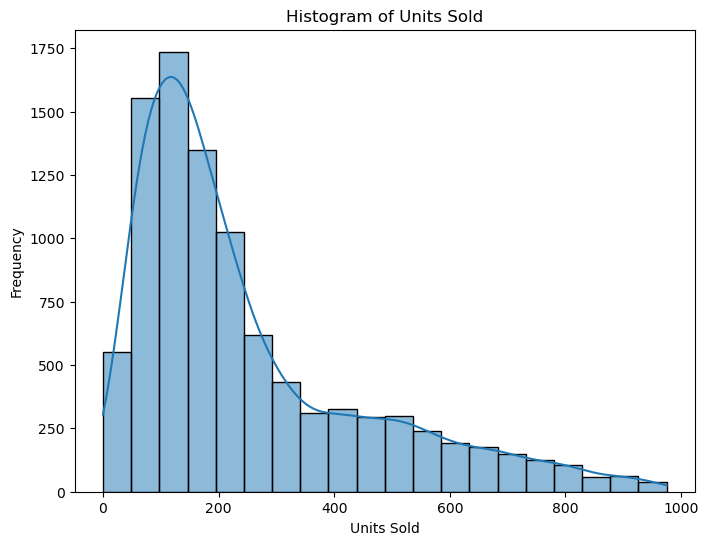

In [26]:
total_units_sold = df2.groupby('Sales Method')['Units Sold'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.histplot(df['Units Sold'], bins=20, kde=True)
plt.title('Histogram of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()

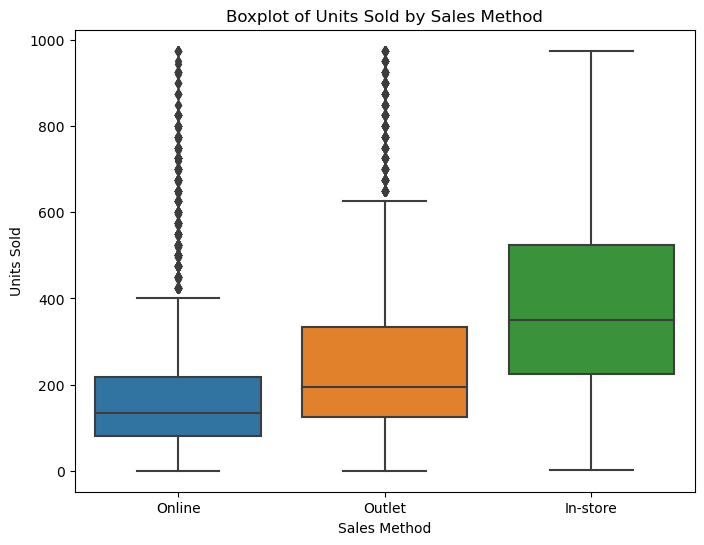

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sales Method', y='Units Sold', data=df2)
plt.title('Boxplot of Units Sold by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Units Sold')
plt.show()

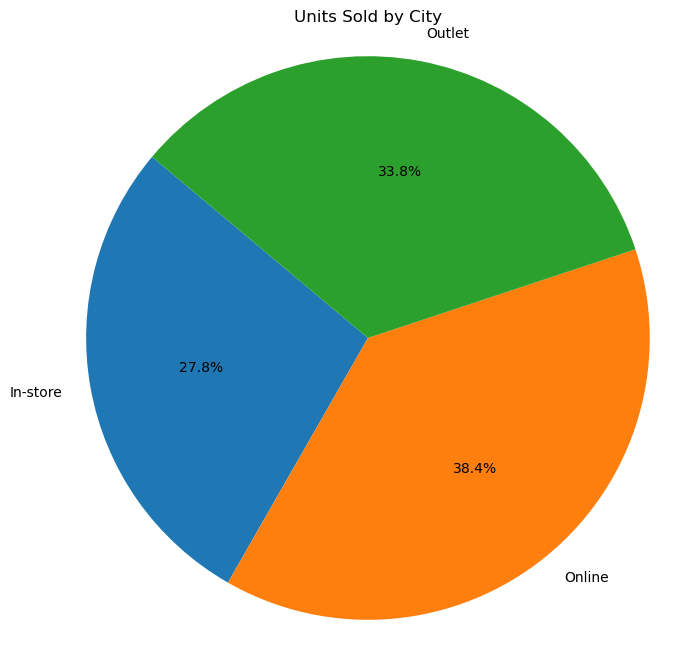

In [28]:


# Group data by city and sum units sold
city_units = df2.groupby('Sales Method')['Units Sold'].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(city_units, labels=city_units.index, autopct='%1.1f%%', startangle=140)
plt.title('Units Sold by City')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Descriptive statistics for 'Units Sold'

1. calculate the Range
2. calculate the Interquartile Range (IQR)
3. calculate the Coefficient of Variation (CV)
4. calculate the Skewness
5. calculate the Kurtosis
6. calculate the sum
7. calculate the mean
8. calculate the median
9. calculate the mode
10. calculate the variance
11. calculate the standard deviation
12. calculate the minimum
13. calculate the maximum
14. calculate the quartiles



In [29]:
import numpy as np
from scipy.stats import skew, kurtosis

def mean(data):
    return sum(data) / len(data)

#function to calculate the median
def median(data):
    sorted_data = sorted(data)
    n = len(data)
    if n % 2 == 0:
        return (sorted_data[n//2 - 1] + sorted_data[n//2]) / 2
    else:
        return sorted_data[n//2]

#function to calculate the mode
def mode(data):
    frequency = {}
    for value in data:
        frequency[value] = frequency.get(value, 0) + 1
    max_frequency = max(frequency.values())
    mode_values = [key for key, val in frequency.items() if val == max_frequency]
    return mode_values

#function to calculate the variance
def variance(data):
    mu = mean(data)
    return sum((x - mu) ** 2 for x in data) / len(data)

#function to calculate the standard deviation
def std_dev(data):
    return variance(data) ** 0.5

#function to calculate the minimum
def minimum(data):
    return min(data)

#function to calculate the maximum
def maximum(data):
    return max(data)

#function to calculate quartiles
def quartiles(data):
    sorted_data = sorted(data)
    n = len(data)
    q1 = median(sorted_data[:n//2])
    q2 = median(sorted_data)
    q3 = median(sorted_data[(n+1)//2:])
    return q1, q2, q3

# Calculate Range
def data_range(data):
    return max(data) - min(data)

# Calculate Interquartile Range (IQR)
def iqr(data):
    q1, _, q3 = np.percentile(data, [25, 50, 75])
    return q3 - q1

# Calculate Coefficient of Variation (CV)
def cv(data):
    return (std_dev(data) / mean(data)) * 100

# Calculate Skewness
def calc_skewness(data):
    return skew(data)

# Calculate Kurtosis
def calc_kurtosis(data):
    return kurtosis(data)

#Descriptive statistics for 'Units Sold' column
units_sold = df2['Units Sold']

#Calculate descriptive statistics
print("1. Range:", data_range(units_sold))
print("2. Interquartile Range (IQR):", iqr(units_sold))
print("3. Coefficient of Variation (CV):", cv(units_sold))
print("4. Skewness:", calc_skewness(units_sold))
print("5. Kurtosis:", calc_kurtosis(units_sold))
print("6. Sum:", sum(units_sold))
print("7. Mean:", mean(units_sold))
print("8. Median:", median(units_sold))
print("9. Mode:", mode(units_sold))
print("10. Variance:", variance(units_sold))
print("11. Standard Deviation:", std_dev(units_sold))
print("12. Minimum:", minimum(units_sold))
print("13. Maximum:", maximum(units_sold))
print("14. Quartiles:", quartiles(units_sold))


1. Range: 975
2. Interquartile Range (IQR): 220.0
3. Coefficient of Variation (CV): 82.0677260426127
4. Skewness: 1.3576076257598262
5. Kurtosis: 1.1621651127932076
6. Sum: 2416944
7. Mean: 250.7463429816371
8. Median: 175
9. Mode: [225]
10. Variance: 42346.15819157467
11. Standard Deviation: 205.78182182003997
12. Minimum: 0
13. Maximum: 975
14. Quartiles: (105, 175, 325)
